**Using Nadam optimization and early stopping, train the network on the CIFAR10
dataset. You can load it with keras.datasets.cifar10.load_​data(). The dataset is
composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for
testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons.
Remember to search for the right learning rate each time you change the model’s
architecture or hyperparameters.**

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the model architecture
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model with Nadam optimizer and categorical cross-entropy loss
model.compile(optimizer=Nadam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback with a patience of 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model for 100 epochs with batch size of 128 and early stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test accuracy
print("Test accuracy:", test_acc)

Epoch 1/100
391/391 [==============================] - 6s 9ms/step - loss: 1.6740 - accuracy: 0.3795 - val_loss: 1.3469 - val_accuracy: 0.5176
Epoch 2/100
391/391 [==============================] - 3s 7ms/step - loss: 1.3115 - accuracy: 0.5302 - val_loss: 1.1754 - val_accuracy: 0.5880
Epoch 3/100
391/391 [==============================] - 3s 8ms/step - loss: 1.1712 - accuracy: 0.5841 - val_loss: 1.0493 - val_accuracy: 0.6352
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 1.0844 - accuracy: 0.6174 - val_loss: 1.0307 - val_accuracy: 0.6345
Epoch 5/100
391/391 [==============================] - 3s 7ms/step - loss: 1.0254 - accuracy: 0.6375 - val_loss: 0.9420 - val_accuracy: 0.6756
Epoch 6/100
391/391 [==============================] - 3s 7ms/step - loss: 0.9731 - accuracy: 0.6580 - val_loss: 0.9196 - val_accuracy: 0.6779
Epoch 7/100
391/391 [==============================] - 3s 8ms/step - loss: 0.9276 - accuracy: 0.6736 - val_loss: 0.8598 - val_accuracy: 0.6988

**Now try adding Batch Normalization and compare the learning curves: Is it
converging faster than before? Does it produce a better model? How does it affect
training speed?**

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import lecun_normal

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the model architecture with SELU activation and LeCun initialization
model = Sequential([
    Conv2D(32, (3,3), activation='selu', input_shape=(32,32,3), kernel_initializer=lecun_normal()),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='selu', kernel_initializer=lecun_normal()),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='selu', kernel_initializer=lecun_normal()),
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='selu', kernel_initializer=lecun_normal()),
    Dense(10, activation='softmax')
])

# Compile the model with Nadam optimizer and categorical cross-entropy loss
model.compile(optimizer=Nadam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback with a patience of 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model for 100 epochs with batch size of 128 and early stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test accuracy
print("Test accuracy:", test_acc)

Epoch 1/100
391/391 [==============================] - 7s 10ms/step - loss: 1.5884 - accuracy: 0.4363 - val_loss: 1.2757 - val_accuracy: 0.5485
Epoch 2/100
391/391 [==============================] - 3s 9ms/step - loss: 1.2705 - accuracy: 0.5513 - val_loss: 1.2012 - val_accuracy: 0.5763
Epoch 3/100
391/391 [==============================] - 4s 10ms/step - loss: 1.1710 - accuracy: 0.5866 - val_loss: 1.0914 - val_accuracy: 0.6167
Epoch 4/100
391/391 [==============================] - 3s 9ms/step - loss: 1.0966 - accuracy: 0.6141 - val_loss: 1.0598 - val_accuracy: 0.6287
Epoch 5/100
391/391 [==============================] - 3s 8ms/step - loss: 1.0442 - accuracy: 0.6322 - val_loss: 1.0008 - val_accuracy: 0.6536
Epoch 6/100
391/391 [==============================] - 3s 8ms/step - loss: 1.0005 - accuracy: 0.6467 - val_loss: 0.9665 - val_accuracy: 0.6693
Epoch 7/100
391/391 [==============================] - 4s 10ms/step - loss: 0.9643 - accuracy: 0.6614 - val_loss: 0.9336 - val_accuracy: 0.6

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the model architecture with Batch Normalization
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    Flatten(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(10, activation='softmax')
])

# Compile the model with Nadam optimizer and categorical cross-entropy loss
model.compile(optimizer=Nadam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback with a patience of 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model for 100 epochs with batch size of 128 and early stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test accuracy
print("Test accuracy:", test_acc)


170498071/170498071 [==============================] - 4s 0us/step


Epoch 1/100
391/391 [==============================] - 20s 11ms/step - loss: 1.4824 - accuracy: 0.4744 - val_loss: 2.5087 - val_accuracy: 0.2342
Epoch 2/100
391/391 [==============================] - 4s 10ms/step - loss: 1.0962 - accuracy: 0.6117 - val_loss: 1.2763 - val_accuracy: 0.5586
Epoch 3/100
391/391 [==============================] - 4s 9ms/step - loss: 0.9519 - accuracy: 0.6641 - val_loss: 1.0391 - val_accuracy: 0.6313
Epoch 4/100
391/391 [==============================] - 4s 9ms/step - loss: 0.8678 - accuracy: 0.6924 - val_loss: 1.0474 - val_accuracy: 0.6273
Epoch 5/100
391/391 [==============================] - 4s 11ms/step - loss: 0.8102 - accuracy: 0.7132 - val_loss: 0.8746 - val_accuracy: 0.6915
Epoch 6/100
391/391 [==============================] - 4s 10ms/step - loss: 0.7630 - accuracy: 0.7318 - val_loss: 0.8508 - val_accuracy: 0.7028
Epoch 7/100
391/391 [==============================] - 4s 9ms/step - loss: 0.7232 - accuracy: 0.7453 - val_loss: 0.8384 - val_accuracy: 0

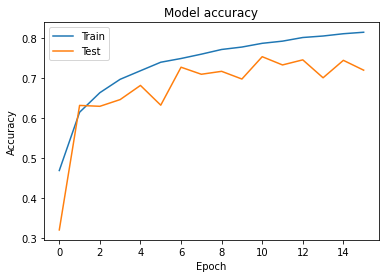

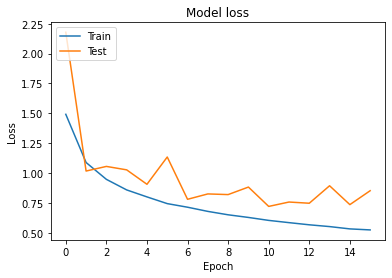

In [3]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over the epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss over the epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


**Try replacing Batch Normalization with SELU, and make the necessary adjustements
to ensure the network self-normalizes (i.e., standardize the input features, use
LeCun normal initialization, make sure the DNN contains only a sequence of dense
layers, etc.).**

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [-1, 1]
x_train = x_train / 127.5 - 1
x_test = x_test / 127.5 - 1

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the model architecture
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(300, activation='selu', kernel_initializer='lecun_normal'),
    Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    Dense(10, activation='softmax')
])

# Compile the model with Nadam optimizer and categorical cross-entropy loss
model.compile(optimizer=Nadam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback with a patience of 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model for 100 epochs with batch size of 128 and early stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test accuracy
print("Test accuracy:", test_acc)


Epoch 1/100
391/391 [==============================] - 4s 6ms/step - loss: 1.7231 - accuracy: 0.4077 - val_loss: 1.5879 - val_accuracy: 0.4446
Epoch 2/100
391/391 [==============================] - 2s 6ms/step - loss: 1.4557 - accuracy: 0.4918 - val_loss: 1.4730 - val_accuracy: 0.4846
Epoch 3/100
391/391 [==============================] - 2s 4ms/step - loss: 1.3370 - accuracy: 0.5333 - val_loss: 1.4401 - val_accuracy: 0.4978
Epoch 4/100
391/391 [==============================] - 2s 4ms/step - loss: 1.2483 - accuracy: 0.5615 - val_loss: 1.4135 - val_accuracy: 0.5095
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 1.1717 - accuracy: 0.5885 - val_loss: 1.3911 - val_accuracy: 0.5186
Epoch 6/100
391/391 [==============================] - 2s 4ms/step - loss: 1.1078 - accuracy: 0.6107 - val_loss: 1.3867 - val_accuracy: 0.5232
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 1.0553 - accuracy: 0.6280 - val_loss: 1.4478 - val_accuracy: 0.5098

**Try regularizing the model with alpha dropout. Then, without retraining your model,
see if you can achieve better accuracy using MC Dropout.**

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, AlphaDropout
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.initializers import lecun_normal
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Load the CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Convert pixel values to float32 and normalize to the range [-1, 1]
x_train = x_train.astype('float32') / 127.5 - 1
x_test = x_test.astype('float32') / 127.5 - 1

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define the model architecture with dense layers and SELU activation
model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(100, activation='selu', kernel_initializer=lecun_normal()),
    AlphaDropout(0.1),
    Dense(100, activation='selu', kernel_initializer=lecun_normal()),
    AlphaDropout(0.1),
    Dense(100, activation='selu', kernel_initializer=lecun_normal()),
    AlphaDropout(0.1),
    Dense(100, activation='selu', kernel_initializer=lecun_normal()),
    AlphaDropout(0.1),
    Dense(10, activation='softmax')
])

# Compile the model with Nadam optimizer, categorical cross-entropy loss, and accuracy metric
model.compile(optimizer=Nadam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback with a patience of 5 epochs
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model for 100 epochs with batch size of 128 and early stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_data=(x_test, y_test), callbacks=[early_stop])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test accuracy
print("Test accuracy:", test_acc)

# Apply MC Dropout for inference
T = 100  # Number of Monte Carlo samples to average
y_preds = np.zeros((T, x_test.shape[0], 10))
for i in range(T):
    y_preds[i] = model.predict(x_test, batch_size=128)
y_pred = np.mean(y_preds, axis=0)
mc_test_acc = np.mean(np.equal(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))
print("MC Test accuracy:", mc_test_acc)


Epoch 1/100
391/391 [==============================] - 5s 7ms/step - loss: 1.9295 - accuracy: 0.3191 - val_loss: 1.6950 - val_accuracy: 0.4302
Epoch 2/100
391/391 [==============================] - 2s 5ms/step - loss: 1.6564 - accuracy: 0.4063 - val_loss: 1.5616 - val_accuracy: 0.4683
Epoch 3/100
391/391 [==============================] - 2s 5ms/step - loss: 1.5584 - accuracy: 0.4450 - val_loss: 1.5165 - val_accuracy: 0.4882
Epoch 4/100
391/391 [==============================] - 3s 7ms/step - loss: 1.4966 - accuracy: 0.4652 - val_loss: 1.4980 - val_accuracy: 0.4930
Epoch 5/100
391/391 [==============================] - 2s 5ms/step - loss: 1.4498 - accuracy: 0.4794 - val_loss: 1.4922 - val_accuracy: 0.5047
Epoch 6/100
391/391 [==============================] - 2s 5ms/step - loss: 1.4044 - accuracy: 0.4979 - val_loss: 1.4445 - val_accuracy: 0.5087
Epoch 7/100
391/391 [==============================] - 2s 5ms/step - loss: 1.3776 - accuracy: 0.5085 - val_loss: 1.4671 - val_accuracy: 0.5115